# Assignment 1 Part 2

Import libraries

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic

Upload StudentPerformance.csv

In [23]:
# Read csv file and print first 20 rows for confirmation
df = pd.read_csv('/content/data_raw/StudentsPerformance.csv')
df.head(20)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [9]:
df.shape

(1000, 8)

# Data Processing

Begin evaluation of dataset for preprocessing

In [13]:
# Copy dataset to keep raw data unchanged, this will be dataframe to preprocess
student_df = df.copy()

In [14]:
# Check for null and NaN values
print(student_df.isna().sum())

# Check feature types
df.dtypes

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


,0
gender,object
race/ethnicity,object
parental level of education,object
lunch,object
test preparation course,object
math score,int64
reading score,int64
writing score,int64


In [16]:
# Check numeric features
numeric_df = df.select_dtypes(include=np.number).copy()
numeric_df

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75
...,...,...,...
995,88,99,95
996,62,55,55
997,59,71,65
998,68,78,77


In [17]:
# Check categorical features
categorical_df = df.select_dtypes(exclude=np.number).copy()
categorical_df

,gender,race/ethnicity,parental level of education,lunch,test preparation course
0,female,group B,bachelor's degree,standard,none
1,female,group C,some college,standard,completed
2,female,group B,master's degree,standard,none
3,male,group A,associate's degree,free/reduced,none
4,male,group C,some college,standard,none
...,...,...,...,...,...
995,female,group E,master's degree,standard,completed
996,male,group C,high school,free/reduced,none
997,female,group C,high school,free/reduced,completed
998,female,group D,some college,standard,completed


In [18]:
# Check unique values of categorical features
categorical_df.nunique(axis=0)

,0
gender,2
race/ethnicity,5
parental level of education,6
lunch,2
test preparation course,2


In [22]:
# Confirm the categorical features are legitimate
print("Gender : " , df['gender'].unique())
print("Race/Ethnicity : ", df['race/ethnicity'].unique())
print("Parental level of education : ", df['parental level of education'].unique())
print("Lunch : ", df['lunch'].unique())
print("Test preparation course : ", df['test preparation course'].unique())

Gender :  ['female' 'male']
Race/Ethnicity :  ['group B' 'group C' 'group A' 'group D' 'group E']
Parental level of education :  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Lunch :  ['standard' 'free/reduced']
Test preparation course :  ['none' 'completed']


Save copy of preprocessed data to csv file

In [30]:
# No preprocessing was required
student_df.to_csv('/content/data_clean/StudentsPerformance_cleaned.csv', index=False)

# Data Visualization

In [31]:
# Read preprocessed csv file
preprocessed_df = pd.read_csv('/content/data_clean/StudentsPerformance_cleaned.csv')

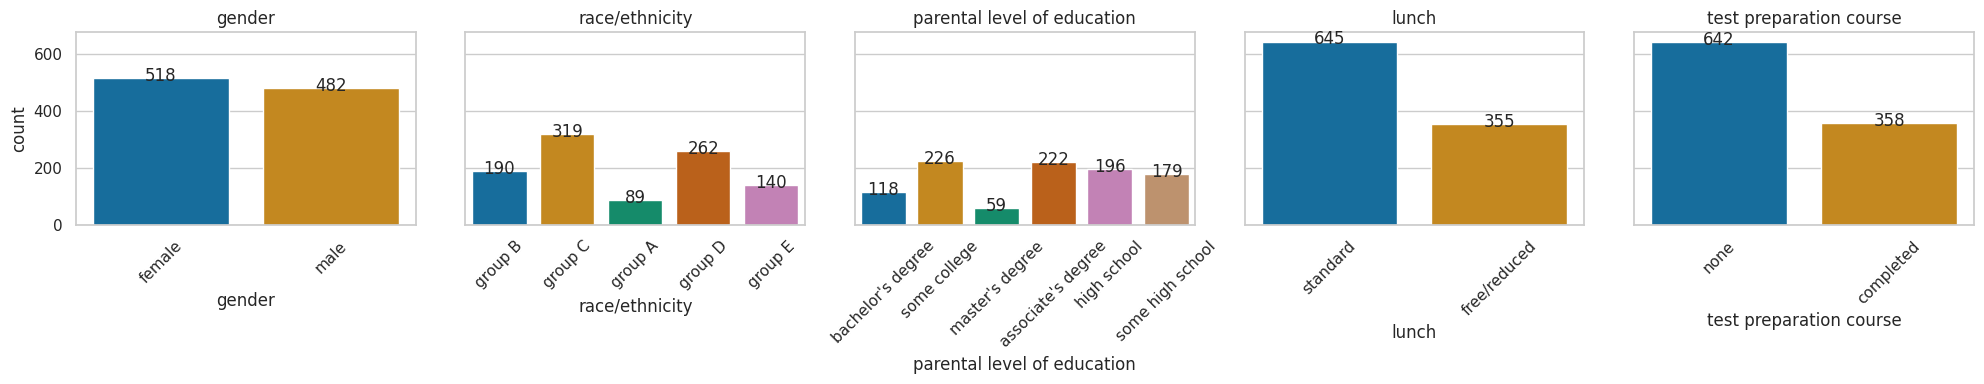

In [45]:
# Updated to seaborn color-blind palette using ChatGPT
# List of categorical columns to plot
categorical_cols = [
    "gender",
    "race/ethnicity",
    "parental level of education",
    "lunch",
    "test preparation course"
]

# Set up subplots
fig, axes = plt.subplots(
    nrows=1,
    ncols=len(categorical_cols),
    figsize=(20, 4),
    sharey=True  # share the y-axis to compare counts across columns
)

# Optional: set a nice baseline theme
sns.set_theme(style="whitegrid")

for i, col in enumerate(categorical_cols):
    # Determine how many unique categories are in this column
    n_cats = df[col].nunique()

    # Create a colorblind palette just large enough for these categories
    cb_palette = sns.color_palette("colorblind", n_colors=n_cats)

    # Draw the countplot with updated parameters
    ax = axes[i]
    sns.countplot(
        data=df,
        x=col,
        hue=col,  # Set hue to the same column as x
        palette=cb_palette,
        legend=False,  # Hide the legend since it's redundant
        ax=ax
    )

    # Add a title and rotate category labels
    ax.set_title(col)
    ax.tick_params(axis='x', labelrotation=45)

    # Annotate each bar with the numeric count
    for p in ax.patches:
        count = int(p.get_height())
        ax.annotate(
            str(count),
            xy=(p.get_x() + p.get_width() / 2, p.get_height()),
            xytext=(0, -5),  # offset label just above the bar
            textcoords="offset points",
            ha="center",
            va="bottom"
        )

plt.tight_layout()
plt.savefig('/content/results/student_distribution_subplots.png', dpi=300, bbox_inches='tight')
plt.show()

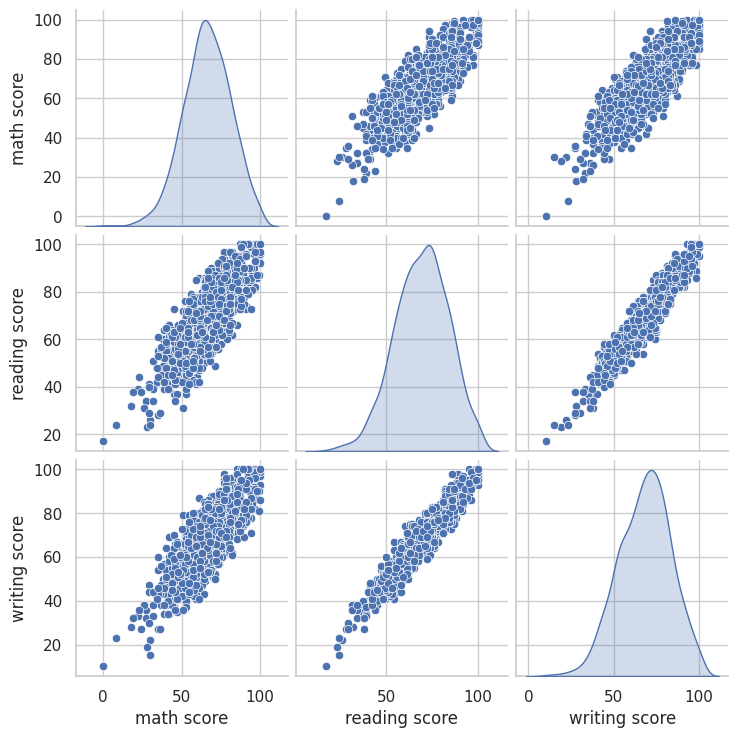

In [46]:
sns.pairplot(df[["math score", "reading score", "writing score"]], diag_kind="kde")

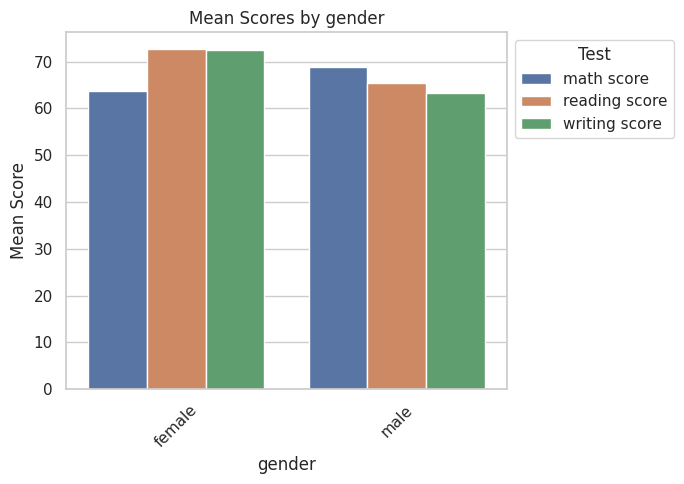

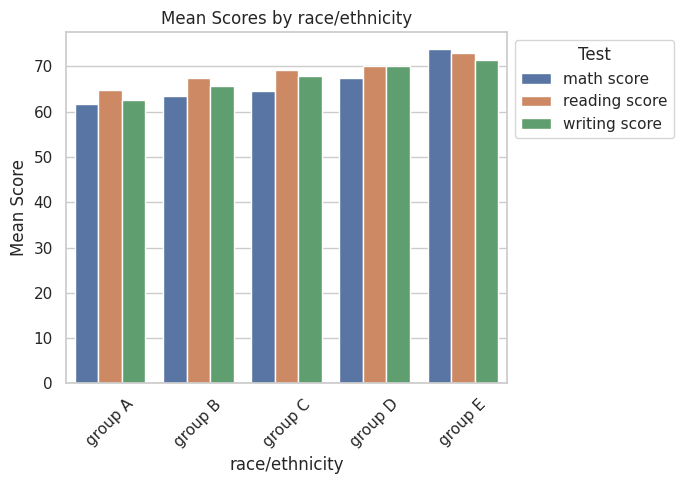

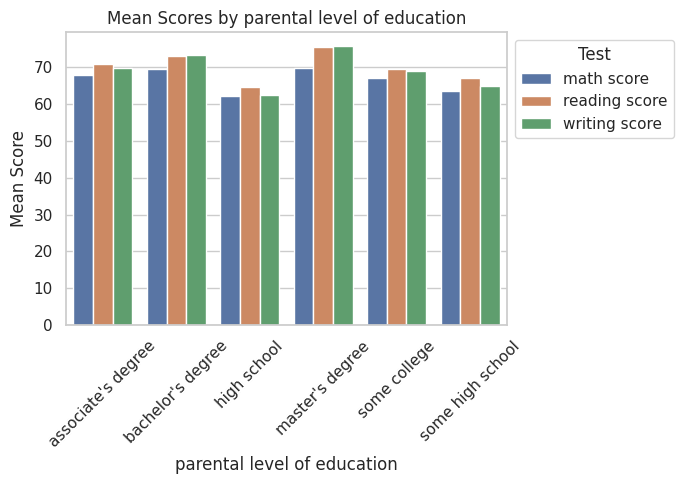

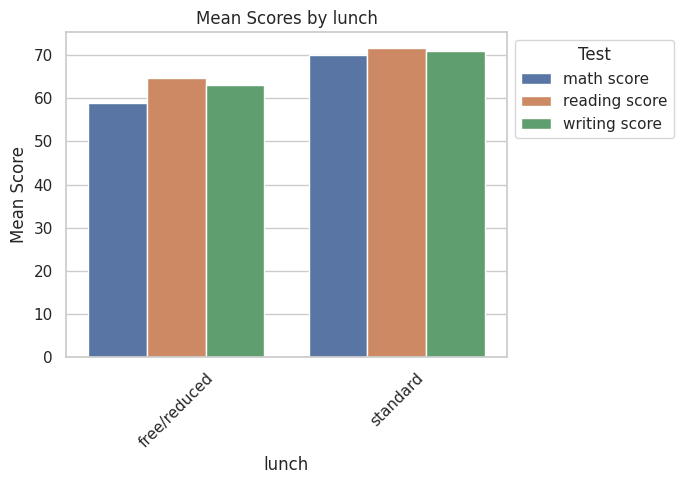

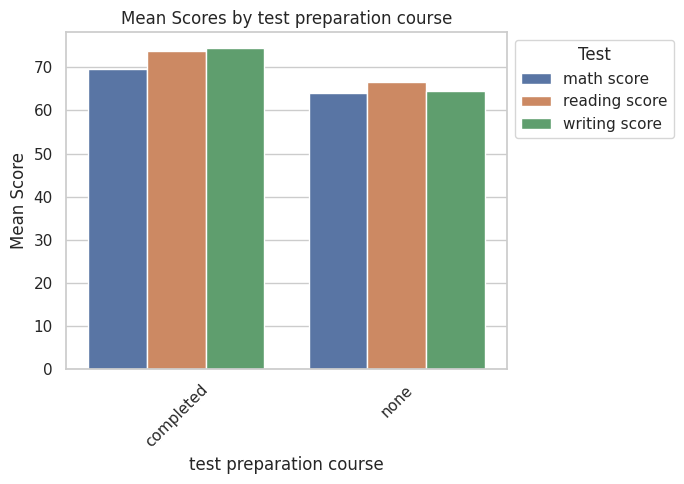

In [51]:
# Compare categories to test scores
categorical_cols = [
    "gender",
    "race/ethnicity",
    "parental level of education",
    "lunch",
    "test preparation course"
]

for cat_col in categorical_cols:
    grouped = df.groupby(cat_col)[["math score","reading score","writing score"]].mean().reset_index()
    melted = grouped.melt(
        id_vars=cat_col,
        value_vars=["math score","reading score","writing score"],
        var_name="Test",
        value_name="Mean Score"
    )

    plt.figure(figsize=(7, 5))
    sns.barplot(
        data=melted,
        x=cat_col,
        y="Mean Score",
        hue="Test",
        errorbar=None
    )
    plt.title(f"Mean Scores by {cat_col}")
    plt.xticks(rotation=45)

    # Move legend to the right
    plt.legend(
        title="Test",
        loc="upper left",
        bbox_to_anchor=(1, 1)  # anchor at top-right corner, outside the plot
    )

    plt.tight_layout()
    plt.savefig('/content/results/student_categories_vs_test_scores_subplots.png', dpi=300, bbox_inches='tight')
    plt.show()

Show grade distributions for all students for each test

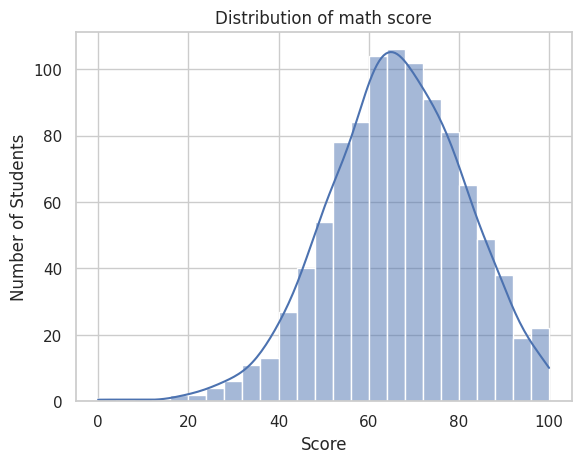

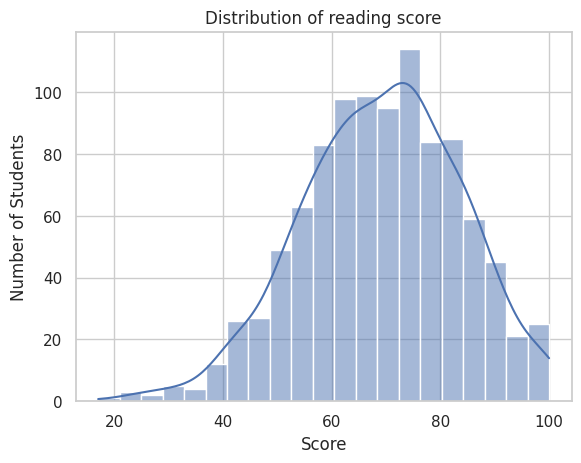

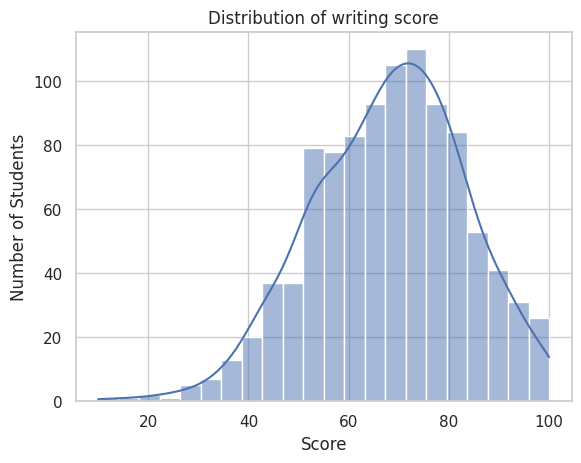

In [53]:
for score_col in ["math score", "reading score", "writing score"]:
    plt.figure()
    sns.histplot(data=df, x=score_col, kde=True)
    plt.title(f"Distribution of {score_col}")
    plt.xlabel("Score")
    plt.ylabel("Number of Students")
    plt.savefig('/content/results/student_test_scores_distribution_subplots.png', dpi=300, bbox_inches='tight')
    plt.show()

Create visuals to help determine what groups to identify as good vs poor test scores.

<Figure size 800x600 with 0 Axes>

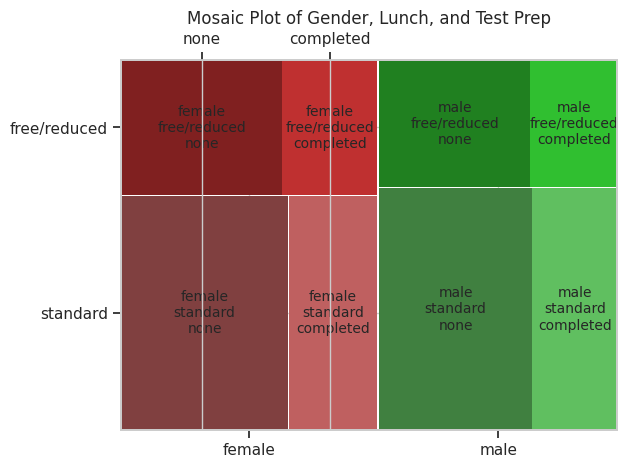

In [65]:
# Example: mosaic of two or three categorical columns
df_small = preprocessed_df[["gender", "lunch", "test preparation course"]]

# Convert to a dictionary of counts
counts = df_small.value_counts().to_dict()

plt.figure(figsize=(8,6))
mosaic(counts, title="Mosaic Plot of Gender, Lunch, and Test Prep")
plt.show()

<Axes: xlabel='lunch-test preparation course-parental level of education', ylabel='gender-race/ethnicity'>

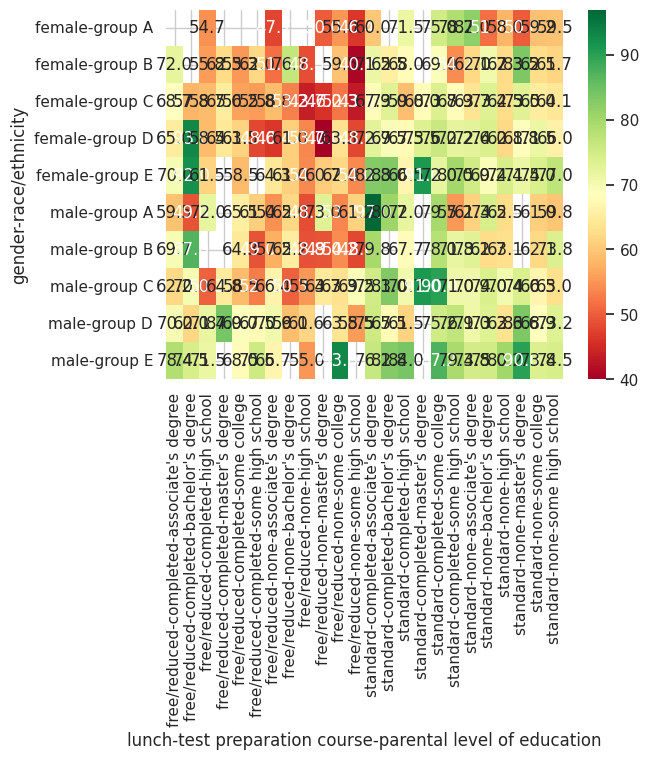

In [67]:
pivoted_5 = df.pivot_table(
    index=["gender", "race/ethnicity"],
    columns=["lunch", "test preparation course", "parental level of education"],
    values="math score",
    aggfunc="mean"
)
sns.heatmap(pivoted_5, annot=True, cmap="RdYlGn", fmt=".1f")

Show groups in each categories based on mean scores

Top 5 category combos:
    gender race/ethnicity     lunch test preparation course  math score  \
18  female        group E  standard               completed   79.176471   
2   female        group A  standard               completed   72.111111   
14  female        group D  standard               completed   72.458333   
10  female        group C  standard               completed   69.717391   
38    male        group E  standard               completed   80.739130   

    reading score  writing score  overall_mean_score  \
18      83.647059      84.764706           82.529412   
2       82.000000      81.444444           78.518519   
14      79.541667      83.250000           78.416667   
10      79.782609      81.608696           77.036232   
38      74.695652      72.913043           76.115942   

                             category_combo  
18  female | group E | standard | completed  
2   female | group A | standard | completed  
14  female | group D | standard | completed  
10  f

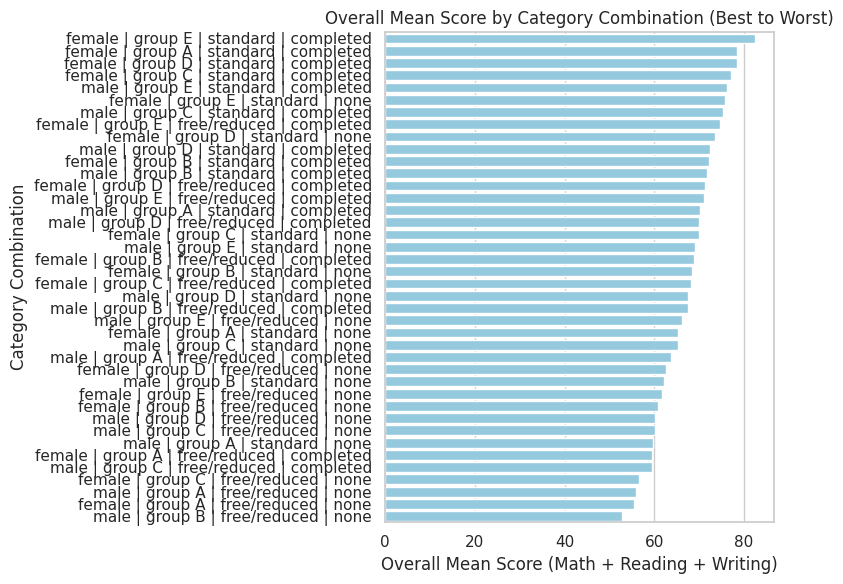

In [70]:
# Group by all relevant categorical columns
grouped = preprocessed_df.groupby(["gender",
                      "race/ethnicity",
                      "lunch",
                      "test preparation course"])[
    ["math score", "reading score", "writing score"]
].mean().reset_index()

# Create a single "overall" metric by averaging math, reading, and writing
grouped["overall_mean_score"] = grouped[["math score","reading score","writing score"]].mean(axis=1)

grouped["category_combo"] = grouped.apply(
    lambda row: f"{row['gender']} | {row['race/ethnicity']} | {row['lunch']} | {row['test preparation course']}",
    axis=1
)

# Sort descending by overall mean score (highest to lowest)
grouped_sorted = grouped.sort_values("overall_mean_score", ascending=False)

# Look at the top 5 or bottom 5
print("Top 5 category combos:")
print(grouped_sorted.head(5))

print("\nBottom 5 category combos:")
print(grouped_sorted.tail(5))

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

# Plot each combination’s overall_mean_score
sns.barplot(
    data=grouped_sorted,
    x="overall_mean_score",
    y="category_combo",
    color="skyblue",   # a single color, or use a palette if you prefer
    errorbar=None      # for seaborn >= 0.14
)

plt.title("Overall Mean Score by Category Combination (Best to Worst)")
plt.xlabel("Overall Mean Score (Math + Reading + Writing)")
plt.ylabel("Category Combination")
plt.tight_layout()
plt.savefig('/content/results/student_mean_scores_category_combo.png', dpi=300, bbox_inches='tight')
plt.show()


Compare free/reduced lunch + no test prep vs standard lunch + completed test prep

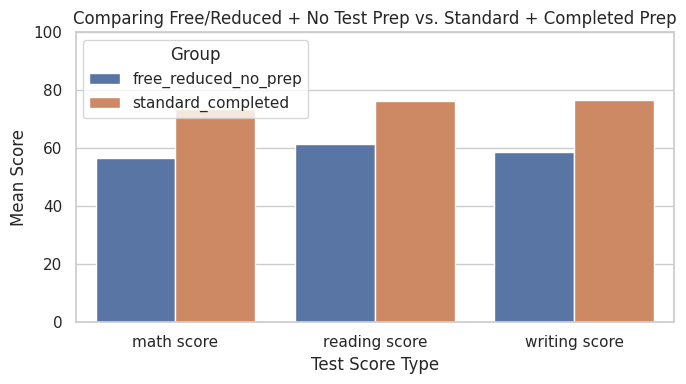

In [71]:

# 1) Filter the two subgroups
group1 = df[(df["lunch"]=="free/reduced") & (df["test preparation course"]=="none")]
group2 = df[(df["lunch"]=="standard") & (df["test preparation course"]=="completed")]

# 2) Compute average math, reading, writing scores in each group
g1_means = group1[["math score","reading score","writing score"]].mean()
g2_means = group2[["math score","reading score","writing score"]].mean()

# 3) Build a small DataFrame with these means
summary_df = pd.DataFrame({
    "score_type": ["math score", "reading score", "writing score"],
    "free_reduced_no_prep": g1_means.values,
    "standard_completed": g2_means.values
})

# 4) Melt into "long" format for an easy grouped bar
summary_melted = summary_df.melt(
    id_vars="score_type",
    var_name="Group",
    value_name="Mean Score"
)

# 5) Plot
plt.figure(figsize=(7,4))
sns.barplot(
    data=summary_melted,
    x="score_type",
    y="Mean Score",
    hue="Group",
    errorbar=None  # For Seaborn >= 0.14
)
plt.title("Comparing Free/Reduced + No Test Prep vs. Standard + Completed Prep")
plt.xlabel("Test Score Type")
plt.ylabel("Mean Score")
plt.ylim(0, 100)  # optional, to keep consistent scale for test scores
plt.tight_layout()
plt.savefig('/content/results/lunch_test_prep_comparison.png', dpi=300, bbox_inches='tight')
plt.show()


# Move updated folder and files to google drive to be added to github